THIS IS A HOUSE PRICE PREDICTION MODEL.

IMPORTING THE ESSENTIAL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#importing all the essential libraries and getting rid of unnecessary warnings

READING THE FILE

In [ ]:
data=pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


CONVERTING THE STRING DATA INTO NUMERICAL FIGURES

In [ ]:
data.mainroad.replace(('yes','no'),(1,0),inplace=True)
data.guestroom.replace(('yes','no'),(1,0),inplace=True)
data.basement.replace(('yes','no'),(1,0),inplace=True)
data.hotwaterheating.replace(('yes','no'),(1,0),inplace=True)
data.airconditioning.replace(('yes','no'),(1,0),inplace=True)
data.prefarea.replace(('yes','no'),(1,0),inplace=True)
data.furnishingstatus.replace(('furnished','semi-furnished','unfurnished'),(1,0.5,0),inplace=True)
data.head()
#converting the string data into most relevant numbers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


CHECKING THE FILE FOR ANY NULL ENTRIES

In [ ]:
data.info()
#there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


CHECKING THE DESCREIPTION

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


AREA IS THE MOST IMPORTANT FACTOR. ANY DRASTIC CHANGE IN AREA WILL OUTWEIGH ALL OTHER PARAMETERS SO SUCH VALUES ARE NOT MUCH SIGNIFICANT.

<Axes: ylabel='area'>

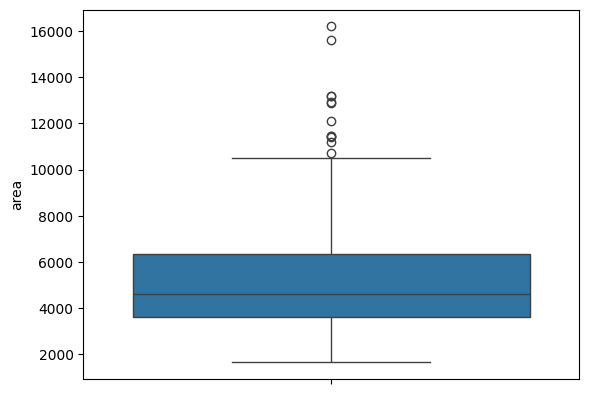

In [ ]:
sns.boxplot(data['area'])

REMOVING THE OUTLIERS BASED ON IQR

In [ ]:
q1=data['area'].quantile(0.25)
q3=data['area'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
data=data[(data['area']<=upper_bound)]
print("Lower Bound=",lower_bound)
print("Upper Bound=",upper_bound)
data.head()
#the lower bound is obviously insignificant here

Lower Bound= -540.0
Upper Bound= 10500.0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


ALLOCATING VALUES TO X(INDEPENDENT) AND Y(DEPENDENT)

In [ ]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
#allocating values to x and y

VIEWING THE DEPENDENCE OF PRICING ON AREA

Text(0.5, 1.0, 'PRICE VS AREA')

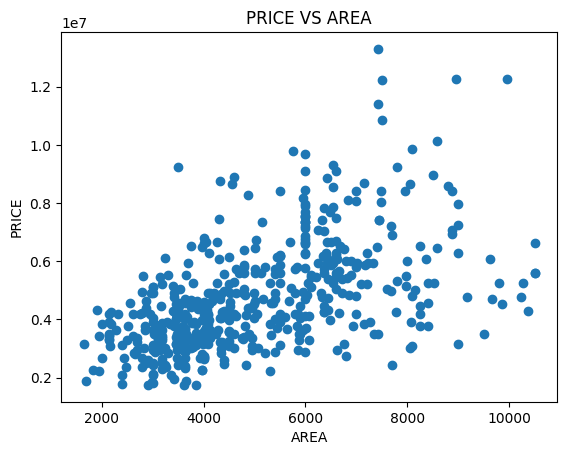

In [ ]:
plt.scatter(x['area'],y)
plt.xlabel('AREA')
plt.ylabel('PRICE')
plt.title('PRICE VS AREA')
#the dependence is slightly linear

DIVIDING THE DATA INTO TRAINING AND TESTING PARTS

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=50)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(426, 12)
(426,)
(107, 12)
(107,)


TRAINING THE MODEL USING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.learning_rate = 0.01
model.fit(x_train,y_train)
#the model is now trained simply using linear regression

LinearRegression()

TESTING THE MODEL USING THE TESTING DATA

In [ ]:
y_predicted=model.predict(x_test)

VIEWING THE PREDICTED VALUES AGAINST THE ACTUAL VALUES

Text(0.5, 1.0, 'ACTUAL VS PREDICTED VALUES')

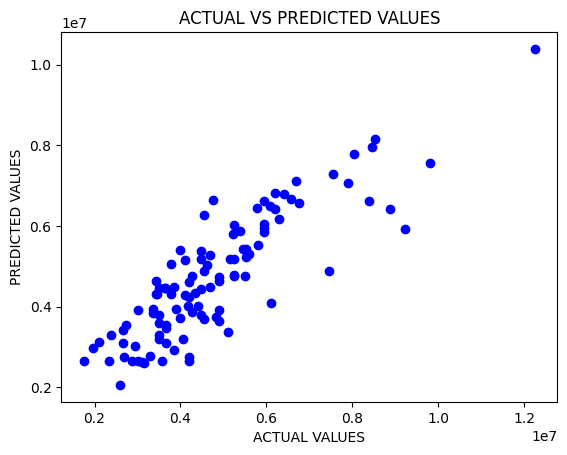

In [ ]:
plt.scatter(y_test,y_predicted,color='b')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.title('ACTUAL VS PREDICTED VALUES')

THE MEAN ABSOLUTE ERROR

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)

677223.0478214176

THE R-SQUARED TERM

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

0.7420232744477411

THE MEAN-SQUARED ERROR

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)

829637637412.8893